In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Regression loss  
* MSE
* MAE
* Huber loss

$ MSE = \sum\limits_{i=1}^n  {(y_i - y_i^p)}^2 $  

In [4]:
def mse(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean square error loss
    """
    
    return np.sum((true - pred)**2)

 $ MAE = \sum\limits_{i=1}^n  {|y_i - y_i^p|} $  

In [5]:
def mae(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: mean absolute error loss
    """
    
    return np.sum(np.abs(true - pred))

Smooth Mean Absolute Error/ Huber Loss 

In [6]:
def sm_mae(true, pred, delta):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: smoothed mean absolute error loss
    """
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

Kullback–Leibler divergence

In [7]:
def kld(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: KL divergence loss
    """
    loss = pred*(np.log(pred) - true)
    return np.sum(loss)

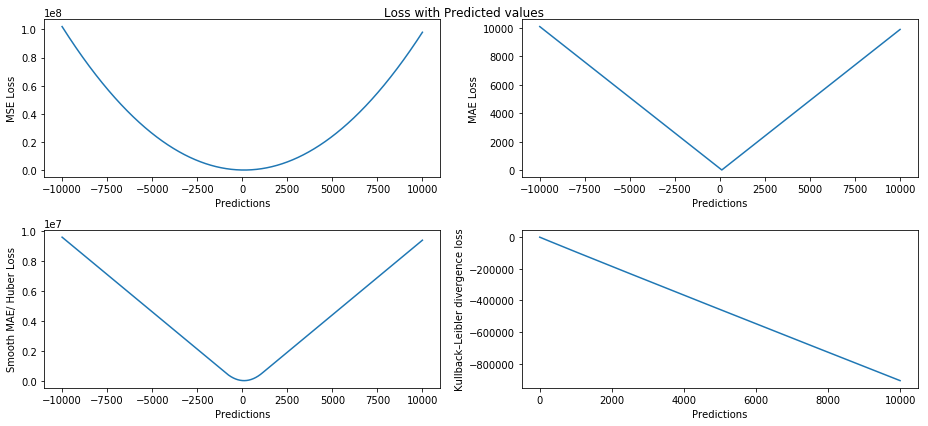

In [115]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (13,6))

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

# calculating loss function for all predictions. 
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]
loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]
loss_sm_mae = [sm_mae(target[i], pred[i], 1000) for i in range(len(pred))]
loss_kld = [kld(target[i], pred[i]) for i in range(len(pred))]


# plot for MSE
ax1.plot(pred, loss_mse)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('MSE Loss')

# plot for MAE
ax2.plot(pred, loss_mae)
ax2.set_xlabel('Predictions')
ax2.set_ylabel('MAE Loss')

# plot for Smooth MAE
ax3.plot(pred, loss_sm_mae)
ax3.set_xlabel('Predictions')
ax3.set_ylabel('Smooth MAE/ Huber Loss')

# plot for KL divergence
ax4.plot(pred, loss_kld)
ax4.set_xlabel('Predictions')
ax4.set_ylabel('Kullback–Leibler divergence loss')

fig.suptitle("Loss with Predicted values")
fig.tight_layout()

$ E(y, y^p) = \sum\limits_{i=1}^n  {e^{\beta(-y_i.y_i^p)}} $  

In [136]:
def expo(true, pred, gamma):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: Exponential loss
    """
    loss = np.sum((true - pred)**2)
    return gamma*np.exp(loss/gamma)

In [184]:
def expo_reg(true, pred, gamma):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: Exponential loss
    """
    loss = np.sum((true - pred)**2)
    return gamma*np.exp(loss/gamma)

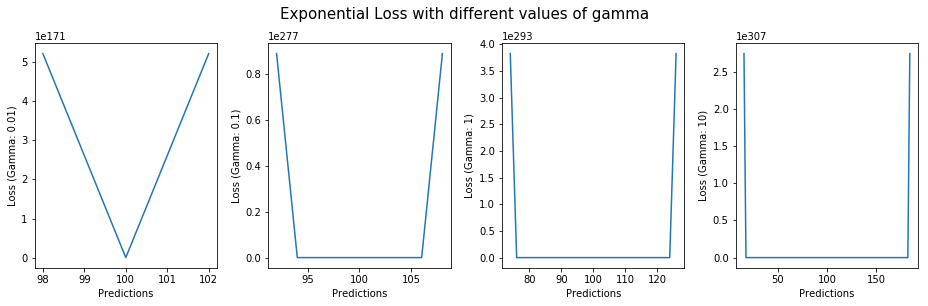

In [219]:
fig, ax = plt.subplots(1, 4, figsize = (13,4))

ax1, ax2, ax3, ax4 = ax.flatten() # extracting all 4 axes using flatten

# array of same target value 10000 times
target = np.repeat(100, 10000) 
pred = np.arange(-10000,10000, 2)

# calculating loss function for all predictions. 
loss_exp1 = [expo_reg(target[i], pred[i], 0.01) for i in range(len(pred))]
loss_exp2 = [expo_reg(target[i], pred[i], .1) for i in range(len(pred))]
loss_exp3 = [expo_reg(target[i], pred[i], 1) for i in range(len(pred))]
loss_exp4 = [expo_reg(target[i], pred[i], 10) for i in range(len(pred))]

# plots for exponential loss with different gamma

ax1.plot(pred, loss_exp1)
ax2.plot(pred, loss_exp2)
ax3.plot(pred, loss_exp3)
ax4.plot(pred, loss_exp4)

ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss (Gamma: 0.01)')

ax2.set_xlabel('Predictions')
ax2.set_ylabel('Loss (Gamma: 0.1)')

ax3.set_xlabel('Predictions')
ax3.set_ylabel('Loss (Gamma: 1)')

ax4.set_xlabel('Predictions')
ax4.set_ylabel('Loss (Gamma: 10)')

fig.suptitle('Exponential Loss with different values of gamma' , y = 1.05, fontsize=15)

fig.tight_layout()

$ L(y, y^p) = \sum\limits_{i=1}^n  {\log(\cosh(y_i^p-y_i))} $  

In [24]:
def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

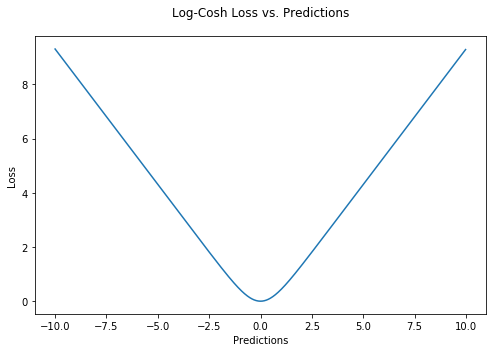

In [306]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

# array of same target value 10000 times
target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]

# plot 
ax1.plot(pred, loss_logcosh)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Log-Cosh Loss vs. Predictions", pad=20)

fig.tight_layout()

fig.savefig('/Users/princegrover/Downloads/Logcosh_Loss.png' )

Quantile loss

 $ L_\gamma(y, y^p) = \sum\limits_{i=y_i<y_i^p}  ({\gamma-1}).|y_i - y_i^p| + \sum\limits_{i=y_i\geq y_i^p}  ({\gamma}).|y_i - y_i^p|  $  

In [15]:
def quan(true, pred, theta):
    loss = np.where(true >= pred, theta*(np.abs(true-pred)), (1-theta)*(np.abs(true-pred)))
    return np.sum(loss)

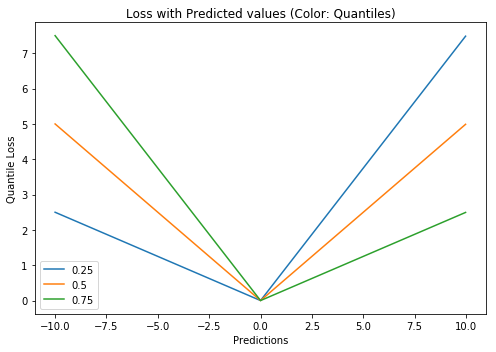

In [22]:
fig, ax1 = plt.subplots(1,1, figsize = (7,5))

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

quantiles = [0.25, 0.5, 0.75]

losses_quan = [[quan(target[i], pred[i], q) for i in range(len(pred))] for q in quantiles]

# plot 
for i in range(len(quantiles)):
    ax1.plot(pred, losses_quan[i], label = quantiles[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Quantile Loss')
ax1.set_title("Loss with Predicted values (Color: Quantiles)")
ax1.legend()

fig.tight_layout()

fig.savefig('/Users/princegrover/Documents/msan/Machine-Learning/images/Quantile_Loss.png' )

**All regression losses in single plot**

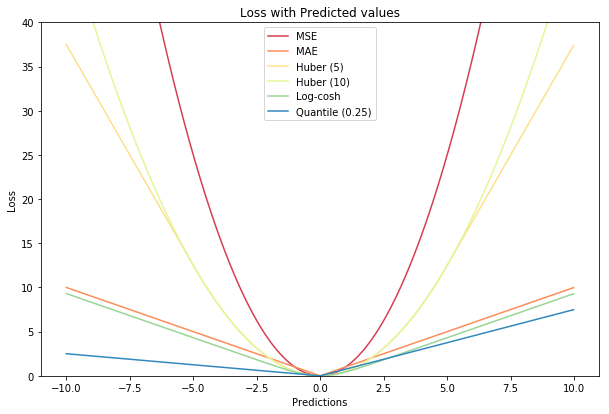

In [33]:
fig, ax1 = plt.subplots(1,1, figsize = (10,6.5))

target = np.repeat(0, 1000) 
pred = np.arange(-10,10, 0.02)

# calculating loss function for all predictions. 
loss_mse = [mse(target[i], pred[i]) for i in range(len(pred))]
loss_mae = [mae(target[i], pred[i]) for i in range(len(pred))]
loss_sm_mae1 = [sm_mae(target[i], pred[i], 5) for i in range(len(pred))]
loss_sm_mae2 = [sm_mae(target[i], pred[i], 10) for i in range(len(pred))]
loss_logcosh = [logcosh(target[i], pred[i]) for i in range(len(pred))]
loss_quan1 = [quan(target[i], pred[i], 0.25) for i in range(len(pred))]


losses = [loss_mse, loss_mae, loss_sm_mae1, loss_sm_mae2, loss_logcosh, loss_quan1]
names = ['MSE', 'MAE','Huber (5)', 'Huber (10)', 'Log-cosh', 'Quantile (0.25)']
cmap = ['#d53e4f',
'#fc8d59',
'#fee08b',
'#e6f598',
'#99d594',
'#3288bd']

for lo in range(len(losses)):
    ax1.plot(pred, losses[lo], label = names[lo], color= cmap[lo])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Loss')
ax1.set_title("Loss with Predicted values")
ax1.legend()
ax1.set_ylim(bottom=0, top=40)

fig.savefig('/Users/princegrover/Documents/msan/Machine-Learning/images/all_regression.png' )

### Classifications loss

* Binary cross entropy 
* Negative log likelihood
* Cross entropy
* Kullback–Leibler divergence


Binary cross entropy or negative log likelihood

In [124]:
def bin_ce(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: binary cross entropy loss
    """
    loss = np.where(true==1, np.log(pred), np.log(1-pred))
    return -np.sum(loss)

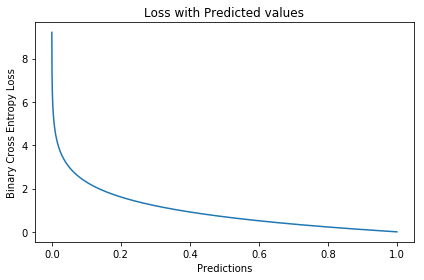

In [135]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_bin_ce = [bin_ce(target[i], pred[i]) for i in range(len(pred))]

# plot for binary cross entropy
ax1.plot(pred, loss_bin_ce)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Binary Cross Entropy Loss/ Log Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()
fig.savefig()

Focal loss

In [223]:
def focal(true, pred, gamma):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: binary cross entropy loss
    """
    loss = np.where(true==1, (1-pred)**gamma*(np.log(pred)), pred**gamma*(np.log(1-pred)))
    return -np.sum(loss)

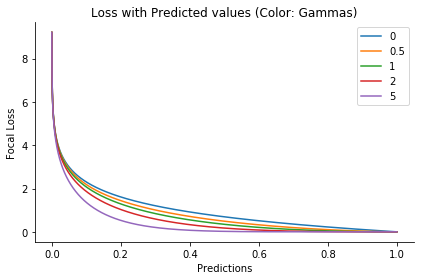

In [236]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
gammas = [0, 0.5, 1, 2, 5]
losses_focal = [[focal(target[i], pred[i], gamma) for i in range(len(pred))] for gamma in gammas]

# plot for binary cross entropy
for i in range(len(gammas)):
    ax1.plot(pred, losses_focal[i], label = gammas[i])
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Focal Loss')
ax1.set_title("Loss with Predicted values (Color: Gammas)")
ax1.legend()

# make right and top lines invisible
ax1.spines['top'].set_visible(False)    # Make the top axis line for a plot invisible
ax1.spines['right'].set_visible(False) # Make the right axis line for a plot invisible

fig.tight_layout()

Hinge loss

In [168]:
def hinge(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.max((0, (1 - pred*true)))
    return np.sum(loss)

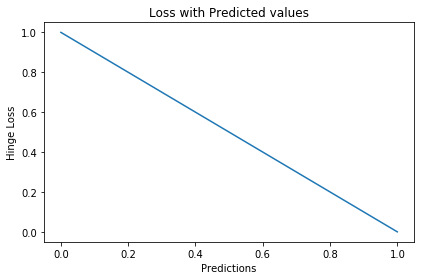

In [169]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_hinge = [hinge(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_hinge)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Hinge Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

Square loss

In [170]:
def sq_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = (1 - pred*true)**2
    return np.sum(loss)

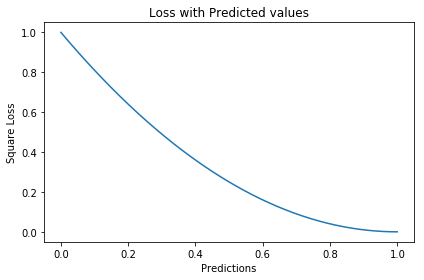

In [171]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_sq = [sq_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_sq)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Square Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

Logistic loss

In [173]:
def log_loss(true, pred):
    """
    true: array of true values    
    pred: array of predicted values
    
    returns: negative log likelihood loss
    """
    loss = np.log(1 + np.exp(-(pred*true)))/np.log(2)
    return np.sum(loss)

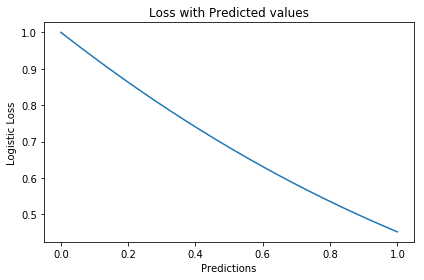

In [175]:
fig, ax1 = plt.subplots(1,1)

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_log_loss = [log_loss(target[i], pred[i]) for i in range(len(pred))]

# plot for hinge
ax1.plot(pred, loss_log_loss)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Logistic Loss')
ax1.set_title("Loss with Predicted values")

fig.tight_layout()

Exponential loss

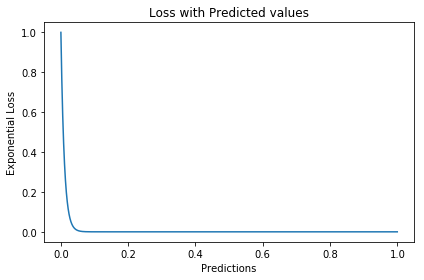

In [179]:
fig, ax1 = plt.subplots()

# array of same target value 10000 times
target = np.repeat(1, 10000) # considering prediction to be 1
pred = np.arange(0,1, 0.0001) # all predictions b/w 0 and 1 for 10k values

# calculating loss function for all predictions. 
loss_exp = [expo(target[i], pred[i], 100) for i in range(len(pred))]

# plot for exponential loss
ax1.plot(pred, loss_exp)
ax1.set_xlabel('Predictions')
ax1.set_ylabel('Exponential Loss')
ax1.set_title("Loss with Predicted values")
fig.tight_layout()

### Embedding loss (have 2 inputs and compare them)

* Hinge embedding criteria
* L1 Hinge embedding
* Cosine distance

### Miscelaneus losses

* Haversine distance
* Weighted average of muliple losses